# EDA - Titanic Project
[Marcos Cavalhieri](mailto:cavalhieri@alumni.usp.br?subject=[Kaggle]%20Titanic%20MLn%20Project)
***

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

### Observações Gerais

In [3]:
#primeira olhada nos dados de treino
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#primeira olhada nos dados de teste
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Análige Geral do Perfil dos Sobreviventes

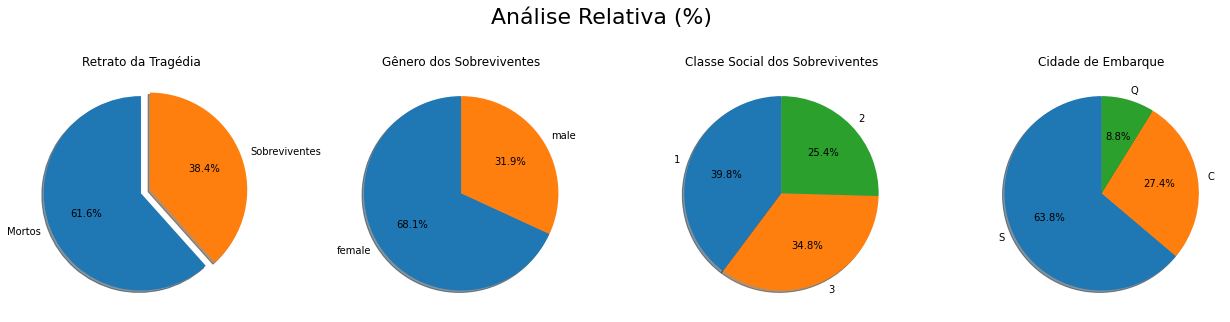

In [123]:
#analise geral do perfil dos sobreviventes
fig = plt.figure(figsize=(22, 5))
ax = fig.add_subplot(1, 4, 1)
ax.pie(train_df.Survived.value_counts(), labels=['Mortos', 'Sobreviventes'], startangle=90, explode=[0, 0.1], shadow=True, autopct='%1.1f%%')
ax.set_title('Retrato da Tragédia')

ax = fig.add_subplot(1, 4, 2)
ax.pie(train_df[train_df.Survived==1].Sex.value_counts(), labels=train_df[train_df.Survived==1].Sex.value_counts().index, startangle=90, shadow=True, autopct='%1.1f%%')
ax.set_title('Gênero dos Sobreviventes')

ax = fig.add_subplot(1, 4, 3)
ax.pie(train_df[train_df.Survived==1].Pclass.value_counts(), labels=train_df[train_df.Survived==1].Pclass.value_counts().index, startangle=90, shadow=True, autopct='%1.1f%%')
ax.set_title('Classe Social dos Sobreviventes')

ax = fig.add_subplot(1, 4, 4)
ax.pie(train_df[train_df.Survived==1].Embarked.value_counts(), labels=train_df[train_df.Survived==1].Embarked.value_counts().index, startangle=90, shadow=True, autopct='%1.1f%%')
ax.set_title('Cidade de Embarque')

fig.subplots_adjust(top=0.8)
fig.suptitle("Análise Relativa (%)", fontsize="22");

**OBS:** de acordo com os dados da base de treino, podemos observar no conjunto de gráficos acima que:
* 38.4% das pessoas a bordo do navio se salvaram;
* Destes que se salvaram, 68.1% eram do gênero feminino;
* Da fatia de sobreviventes, 39.8% pertenciam à 1a classe;
* Por fim, 63.8% dos sobreviventes haviam embarcado em Southampton. 

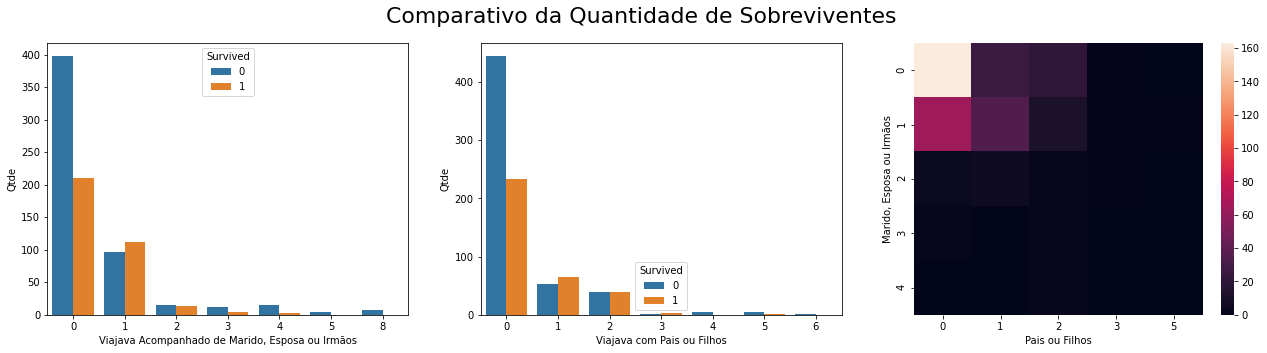

In [115]:
fig = plt.figure(figsize=(22, 5))
ax = fig.add_subplot(1, 3, 1)
sns.countplot(data=train_df, x='SibSp', hue='Survived', ax=ax)
ax.set_xlabel('Viajava Acompanhado de Marido, Esposa ou Irmãos')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(1, 3, 2)
sns.countplot(data=train_df, x='Parch', hue='Survived', ax=ax)
ax.set_xlabel('Viajava com Pais ou Filhos')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(1, 3, 3)
sns.heatmap(pd.crosstab(train_df[train_df.Survived==1].SibSp, train_df[train_df.Survived==1].Parch), ax=ax)
ax.set_xlabel('Pais ou Filhos')
ax.set_ylabel('Marido, Esposa ou Irmãos')

fig.suptitle("Comparativo da Quantidade de Sobreviventes", fontsize="22");

**OBS:** a partir da base de treino e dos gráficos acima, pode-se destacar que:
* A grande maioria dos sobreviventes viajava sozinha;
* Uma segunda parcela expressiva, viajava com 1 acompanhante: marido, esposa ou irmão;
* A maioria também não tinha filhos

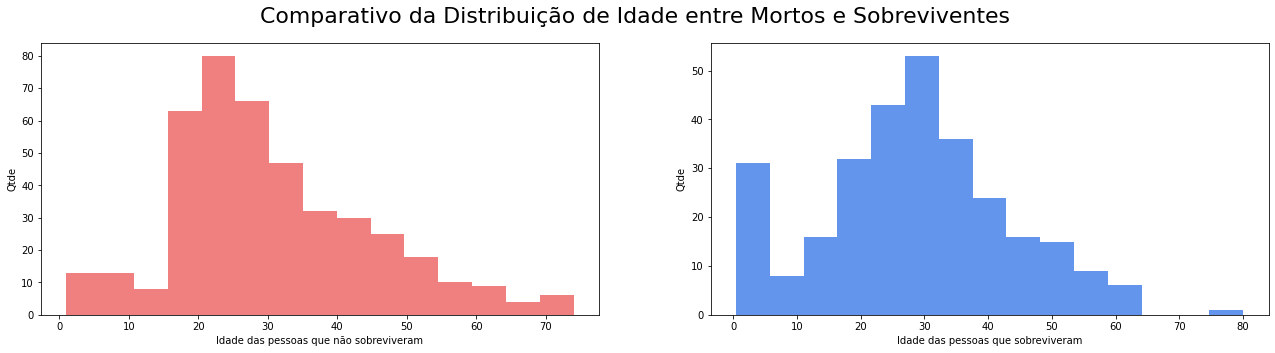

In [113]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(1, 2, 1)
ax.hist(x=train_df[train_df.Survived==0].Age, color='lightcoral', bins=15)
ax.set_xlabel('Idade das pessoas que não sobreviveram')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(1, 2, 2)
ax.hist(x=train_df[train_df.Survived==1].Age, color='cornflowerblue',bins=15)
ax.set_xlabel('Idade das pessoas que sobreviveram')
ax.set_ylabel('Qtde')

fig.suptitle("Comparativo da Distribuição de Idade entre Mortos e Sobreviventes", fontsize="22");

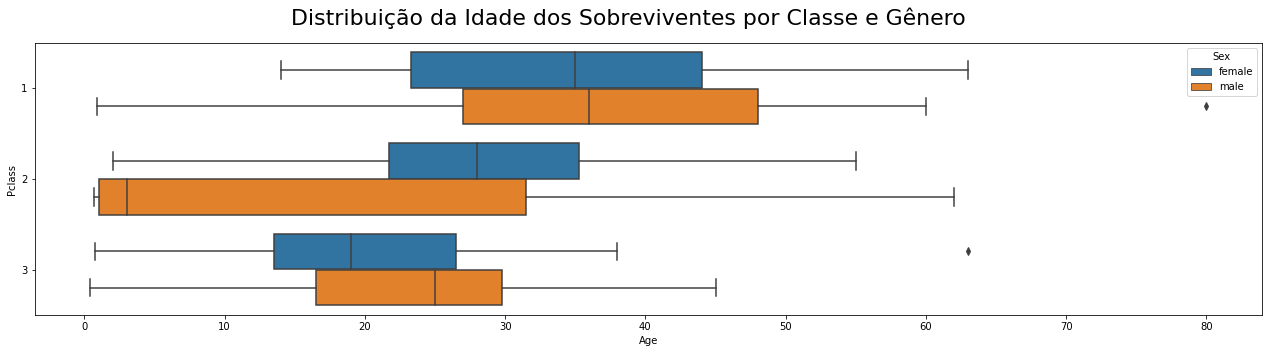

In [110]:
fig = plt.figure(figsize=(22, 5))
ax = sns.boxplot(x="Age", y="Pclass", hue="Sex", data=train_df[train_df.Survived==1], orient="h")
fig.suptitle("Distribuição da Idade dos Sobreviventes por Classe e Gênero", fontsize="22");

**OBS:** analisando os dados de treino e as distribuições de frequência da idade, é de relevância os seguintes pontos:
* A maioria dos sobreviventes tinha entre 20 e 30 anos;
* 2 sobreviventes, em particular, se destacam: uma mulher da 3a classe com mais de 60 anos e um homem da primeira com quase 80 anos;
* Houve um número expressivo de crianças entre os sobreviventes;
* Esse grupo de crianças que sobreviveram à tragédia, se caracteriza por ser em sua maioria, da 2a classe e meninos;


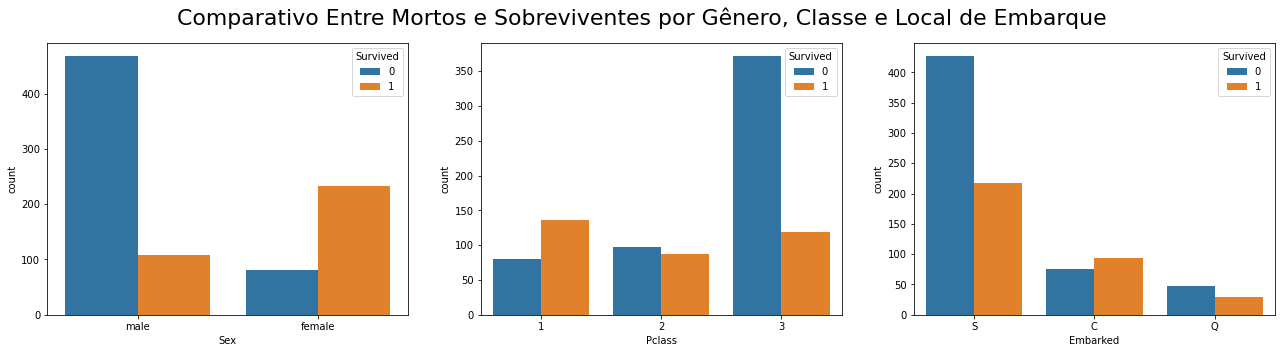

In [112]:
fig = plt.figure(figsize=(22, 5))
ax = fig.add_subplot(1, 3, 1)
sns.countplot(data=train_df, x='Sex', hue='Survived', ax=ax)

ax = fig.add_subplot(1, 3, 2)
sns.countplot(data=train_df, x='Pclass', hue='Survived', ax=ax)

ax = fig.add_subplot(1, 3, 3)
sns.countplot(data=train_df, x='Embarked', hue='Survived', ax=ax)

fig.suptitle("Comparativo Entre Mortos e Sobreviventes por Gênero, Classe e Local de Embarque", fontsize="22");

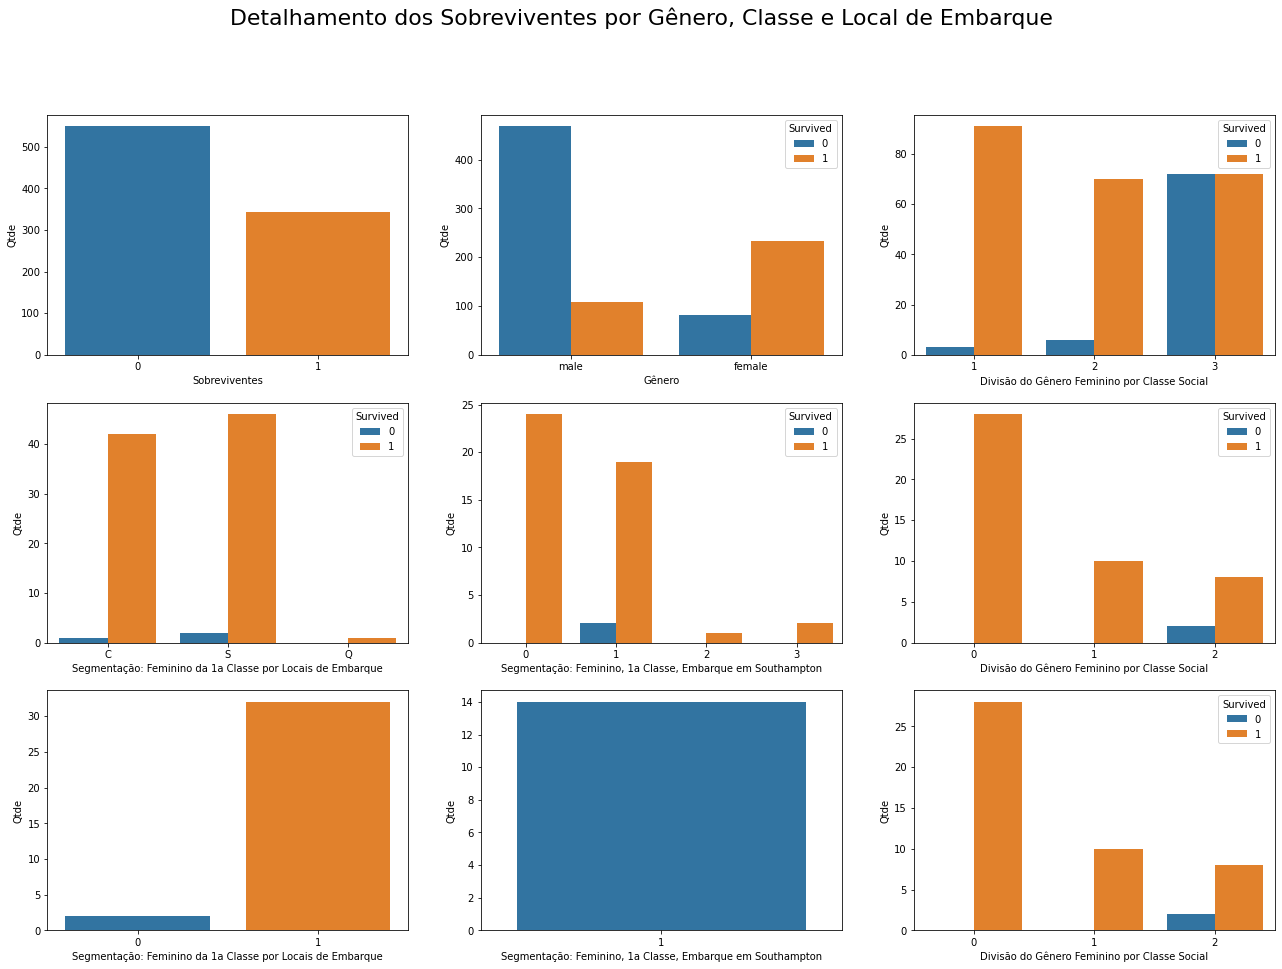

In [8]:
fig = plt.figure(figsize=(22, 15))
ax = fig.add_subplot(3, 3, 1)
sns.countplot(data=train_df, x='Survived', ax=ax)
ax.set_xlabel('Sobreviventes')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(3, 3, 2)
sns.countplot(data=train_df, x='Sex', hue='Survived', ax=ax)
ax.set_xlabel('Gênero')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(3, 3, 3)
sns.countplot(data=train_df[train_df.Sex=='female'], x='Pclass', hue='Survived', ax=ax)
ax.set_xlabel('Divisão do Gênero Feminino por Classe Social')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(3, 3, 4)
sns.countplot(data=train_df[(train_df.Sex=='female')&(train_df.Pclass==1)], x='Embarked', hue='Survived', ax=ax)
ax.set_xlabel('Segmentação: Feminino da 1a Classe por Locais de Embarque')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(3, 3, 5)
sns.countplot(data=train_df[(train_df.Sex=='female')&(train_df.Pclass==1)&(train_df.Embarked=='S')], x='SibSp', hue='Survived', ax=ax)
ax.set_xlabel('Segmentação: Feminino, 1a Classe, Embarque em Southampton')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(3, 3, 6)
sns.countplot(data=train_df[(train_df.Sex=='female')&(train_df.Pclass==1)&(train_df.Embarked=='S')], x='Parch', hue='Survived', ax=ax)
ax.set_xlabel('Divisão do Gênero Feminino por Classe Social')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(3, 3, 7)
sns.countplot(data=train_df[(train_df.Sex=='female')&(train_df.Pclass==1)&(train_df.Embarked=='S')&((train_df.SibSp>0)|(train_df.Parch>0))], x='Survived', ax=ax)
ax.set_xlabel('Segmentação: Feminino da 1a Classe por Locais de Embarque')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(3, 3, 8)
sns.countplot(data=train_df[(train_df.Sex=='female')&(train_df.Pclass==1)&(train_df.Embarked=='S')&(train_df.SibSp==0)&(train_df.Parch==0)], x='Survived', ax=ax)
ax.set_xlabel('Segmentação: Feminino, 1a Classe, Embarque em Southampton')
ax.set_ylabel('Qtde')

ax = fig.add_subplot(3, 3, 9)
sns.countplot(data=train_df[(train_df.Sex=='female')&(train_df.Pclass==1)&(train_df.Embarked=='S')], x='Parch', hue='Survived', ax=ax)
ax.set_xlabel('Divisão do Gênero Feminino por Classe Social')
ax.set_ylabel('Qtde')
fig.suptitle("Detalhamento dos Sobreviventes por Gênero, Classe e Local de Embarque", fontsize="22");

### Relação de Mortos por Gênero e Classe Social

In [60]:
for col in test_df.columns:
    if(train_df[col].nunique()<10):        
        print(col + ': ' + str(train_df[col].unique()))

Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]
